In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler


pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.max_colwidth", None)


In [2]:
train =pd.read_csv('../data/raw/train.csv')
test =pd.read_csv('../data/raw/test.csv')

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [3]:
display(train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
display(train.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# show only na rate > 0 ===> 19 features of 81 features
na_rate =train.isna().mean().sort_values(ascending=False)
na_summary =na_rate[na_rate>0].to_frame(name="na_rate")
display(na_summary)

,na_rate
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479


In [6]:
cat_cols = train.select_dtypes(include=['object']).columns.to_list()
num_cols = train.select_dtypes(exclude=['object']).columns.to_list()

print(f"Number of categorical features: {len(cat_cols)}")
print(f"Number of numerical features: {len(num_cols)}")

Number of categorical features: 43
Number of numerical features: 38


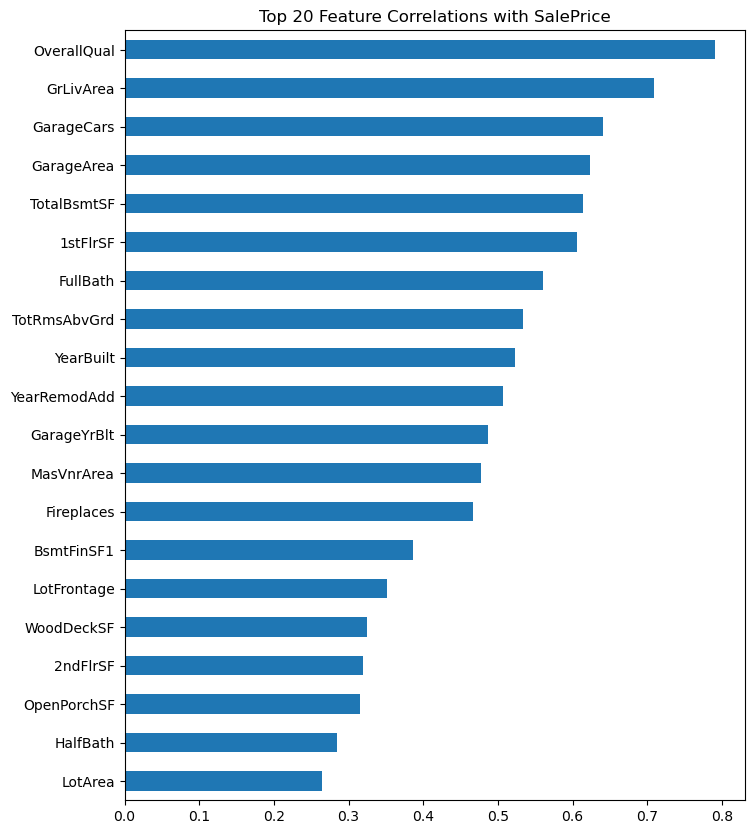

In [7]:
corr = train.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
corr[1:21].plot(kind="barh", figsize=(8, 10), title="Top 20 Feature Correlations with SalePrice")
plt.gca().invert_yaxis()
plt.show()

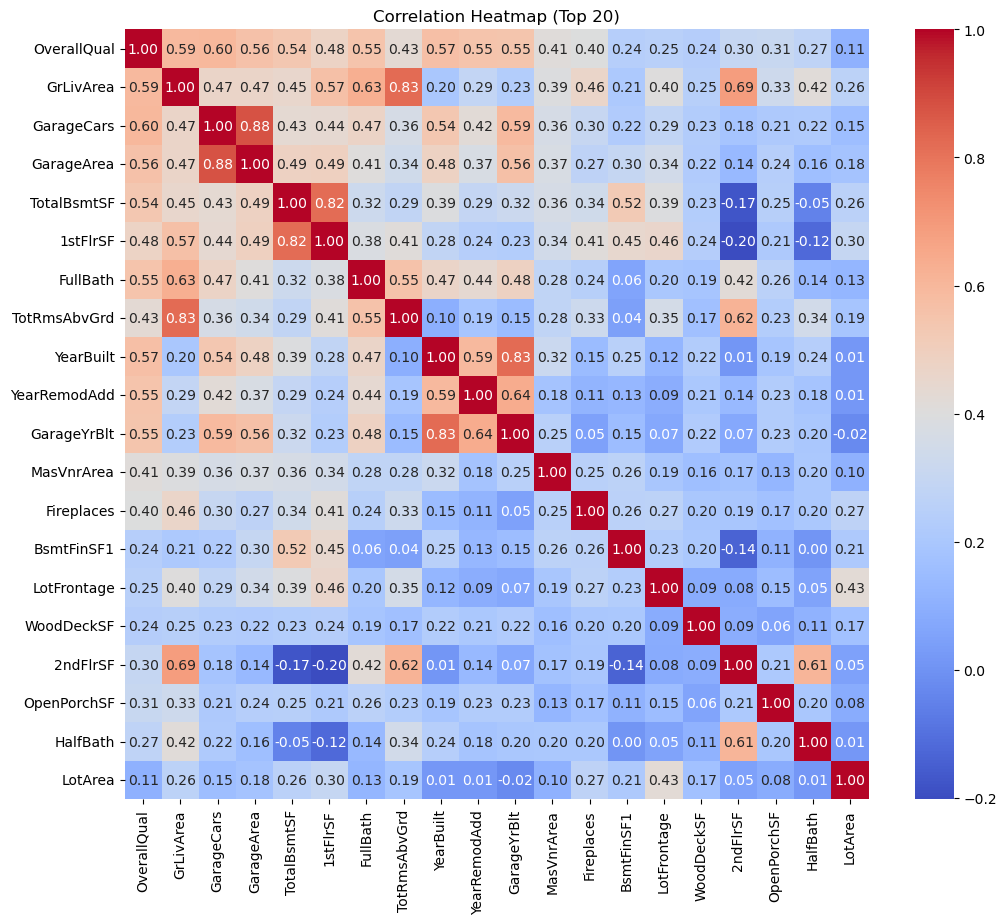

In [8]:
corr =train.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
high_corr_feature= corr[1:21].index
plt.figure(figsize=(12,10))
sns.heatmap(train[high_corr_feature].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Top 20)")
plt.show()

In [9]:
def reduce_vif(df, threshold=5.0, verbose=True, target_col="SalePrice"):
    df_numeric = df.select_dtypes(include=[np.number]).drop(columns=[target_col], errors="ignore")
    df_numeric = df_numeric.dropna(axis=1)
    
    removed_features = []
    iteration = 1

    while True:
        X = add_constant(df_numeric)
        vif_values = []
        feature_names = X.columns

        for i in range(X.shape[1]):
            try:
                vif = variance_inflation_factor(X.values, i)
            except Exception:
                vif = np.nan
            vif_values.append(vif)

        vif_series = pd.Series(vif_values, index=feature_names).drop("const")
        max_vif = vif_series.max()
        max_feature = vif_series.idxmax()

        if verbose:
            print(f" Iteration {iteration}:")
            print(vif_series.sort_values(ascending=False).head(10))
            print(f" Dropping '{max_feature}' (VIF = {max_vif:.2f})")
            print("-" * 40)

        if max_vif <= threshold or max_feature not in df_numeric.columns:
            break

        df_numeric = df_numeric.drop(columns=[max_feature])
        removed_features.append(max_feature)
        iteration += 1

    return df_numeric.columns.tolist(), removed_features

In [10]:
retained_cols, dropped_cols = reduce_vif(train, threshold=5.0)

c:\Users\woody\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\woody\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


 Iteration 1:
GrLivArea            inf
LowQualFinSF         inf
BsmtFinSF1           inf
BsmtFinSF2           inf
BsmtUnfSF            inf
TotalBsmtSF          inf
1stFlrSF             inf
2ndFlrSF             inf
GarageCars      5.495216
GarageArea      5.184802
dtype: float64
 Dropping 'BsmtFinSF1' (VIF = inf)
----------------------------------------
 Iteration 2:
1stFlrSF             inf
2ndFlrSF             inf
LowQualFinSF         inf
GrLivArea            inf
GarageCars      5.495216
GarageArea      5.184802
TotalBsmtSF     4.994710
TotRmsAbvGrd    4.881847
YearBuilt       4.040595
OverallQual     3.239771
dtype: float64
 Dropping '1stFlrSF' (VIF = inf)
----------------------------------------
 Iteration 3:
GrLivArea       11.011472
2ndFlrSF         6.567603
GarageCars       5.495216
GarageArea       5.184802
TotalBsmtSF      4.994710
TotRmsAbvGrd     4.881847
YearBuilt        4.040595
OverallQual      3.239771
FullBath         2.901987
BsmtUnfSF        2.553222
dtype: float64
 Dr

In [11]:
def remove_out_liers_iqr(df, col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df=df[(df[col]>=lower)&(df[col]<=upper)]
    return df[(df[col] >= lower) & (df[col] <= upper)]

train= remove_out_liers_iqr(train, "SalePrice")


In [12]:
num_cols = train.select_dtypes(exclude=['object']).columns.to_list()
num_cols.remove("SalePrice")

scaler= MinMaxScaler()
train_scale= train.copy()
train_scale[num_cols] = scaler.fit_transform(train[num_cols])

In [13]:
# categorical features
cat_cols = train.select_dtypes(include="object").columns.tolist()
na_cat = train[cat_cols].isna().sum()
na_cat = na_cat[na_cat > 0].sort_values(ascending=False)
display(na_cat)


PoolQC          1393
MiscFeature     1345
Alley           1308
Fence           1122
MasVnrType       861
FireplaceQu      689
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
Electrical         1
dtype: int64

In [14]:
# available for fill 'None'
none_fill_cols = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtExposure", "BsmtFinType2", "BsmtQual", "BsmtCond", "BsmtFinType1",
    "MasVnrType" 
]
train[none_fill_cols] = train[none_fill_cols].fillna("None")

# available for fill by mode
mode_fill_cols = ["Electrical"]
for col in mode_fill_cols:
    train[col] = train[col].fillna(train[col].mode()[0])


In [15]:
train_encoded = pd.get_dummies(train, columns=train.select_dtypes(include="object").columns)


In [19]:
# output CSV
os.makedirs("../data/processed", exist_ok=True)
train_encoded.to_csv("../data/processed/train_encoded.csv", index=False)
